In [1]:
import pandas as pd
import Recommender as r
import knn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


c:\Users\Elias\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#uid  = 76561198199414039
u = 76561198199414039

userInteractionsSparse = pd.read_pickle("Data\\userinteractionsSparse.pkl")
gameFeatureMatrix = pd.read_pickle("Data\\gameFeatureMatrix.pkl")
games_owned = userInteractionsSparse[userInteractionsSparse["user"] == u]["appid"].sort_values()
id_list = []

for game_id in games_owned:
    id_list.append(game_id)

g = pd.DataFrame(gameFeatureMatrix, index=id_list)
column_totals = g.sum(axis=0)
totals_row = pd.DataFrame([column_totals.values], columns=g.columns)

print(id_list)

[730.0, 17080.0, 113400.0, 200210.0, 209870.0, 218230.0, 224260.0, 238960.0, 248570.0, 265630.0, 273350.0, 282900.0, 285580.0, 301520.0, 304050.0, 333600.0, 351710.0, 353270.0, 383080.0, 385770.0, 385800.0, 442080.0, 1083500.0]


In [3]:
def calc_sim_2(recs, id_list):
        g = pd.DataFrame(gameFeatureMatrix, index=id_list)
        #column_totals = g.sum(axis=0)
        #totals_row = pd.DataFrame([column_totals.values], columns=g.columns)
        #fin = 0

        recommendations = pd.DataFrame(gameFeatureMatrix, index = recs)
        fin = 0
        for i in range(recommendations.shape[0]):
                best = 0
                first = recommendations.iloc[i]
                for j in range(g.shape[0]):
                        second = g.iloc[j]
                        try:
                                cosine_sim = cosine_similarity(first.values.reshape(1, -1), second.values.reshape(1, -1))
                                if(best < cosine_sim):
                                        best = cosine_sim
                        except:
                                pass
                fin += best
                    
        
        try:
                res = float(fin/recommendations.shape[0])
        except:
                res = 0
        return(res)

In [5]:
import implicit
import scipy

userInteractionsDense = pd.read_pickle("Data/userInteractionsDense.pkl")
ui = userInteractionsDense.copy()

results3 = {}

#loc2appid = dict(zip(range(len(ui.columns.tolist())), ui.columns.tolist()))
#dict from users to loc in model

uid2loc = dict(zip(ui.index.tolist(), range(len(ui.index.tolist()))))
loc2appid = dict(zip(range(len(ui.columns.tolist())), ui.columns.tolist()))
sdf = ui.astype(pd.SparseDtype("float", 0))
ssdf = scipy.sparse.csr_matrix(sdf.sparse.to_coo())
model = implicit.bpr.BayesianPersonalizedRanking()
model.fit(ssdf, show_progress=False)
numRecs = 30


In [6]:
import random

for k in range(200):
        #uid = userInteractionsSparse['user'].sample().values[0]
        uid_list = userInteractionsDense.index.tolist()
        uid = uid_list[random.randint(0,len(uid_list))]
        uid = int(uid)
        games_owned = userInteractionsSparse[userInteractionsSparse["user"] == uid]["appid"].sort_values()
        id_list = []

        for game_id in games_owned:
                id_list.append(game_id)

        uid2loc[uid]
        apLocs, scores = model.recommend(uid2loc[uid], ssdf[uid2loc[uid]], numRecs, filter_already_liked_items=True)
        appids = [loc2appid[apLoc] for apLoc in apLocs]
        
        #appids = []
        #for i in range(30):
        #        appids.append(gameFeatureMatrix.sample().index[0])

        #print(appids)
        #print(id_list)
        results3.update({uid: calc_sim_2(appids, id_list)})

print(results3)

{76561198000085089: 0.5948913418181659}


197
0.5904182846400385


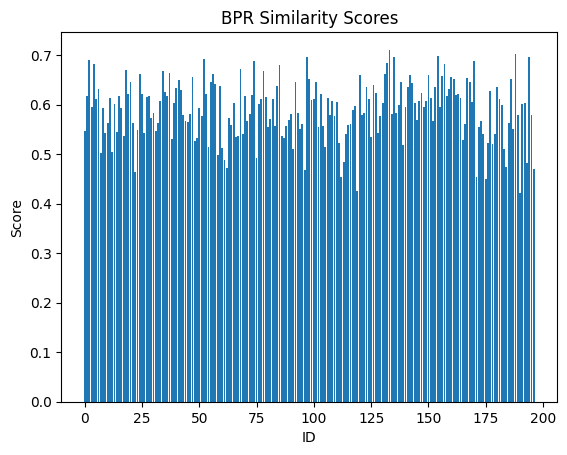

In [15]:
import matplotlib.pyplot as plt
scores = list(results3.values())
total = 0
for i in scores:
    if(i == 0):
        scores.remove(i)
    else:
        total = total+i

total = total / len(scores)
ids = list(range(0, len(scores)))
print(len(scores))
print(total)
plt.bar(ids, scores)
plt.xlabel("ID")
plt.ylabel("Score")
plt.title("BPR Similarity Scores")
plt.show()

In [48]:
import random
results4 = {}


for k in range(200):
        #uid = userInteractionsSparse['user'].sample().values[0]
        uid_list = userInteractionsDense.index.tolist()
        uid = uid_list[random.randint(0,len(uid_list))]
        uid = int(uid)
        games_owned = userInteractionsSparse[userInteractionsSparse["user"] == uid]["appid"].sort_values()
        id_list = []

        for game_id in games_owned:
                id_list.append(game_id)

        uid2loc[uid]

        appids = []
        for i in range(30):
                appids.append(gameFeatureMatrix.sample().index[0])

        #print(appids)
        #print(id_list)
        results4.update({uid: calc_sim_2(appids, id_list)})

print(results4)



0.5206214322264372
0.48612220587195076
0.4630782565261097
0.4426601447275814
0.5490383787817709
0.49748697803259534
0.3378277455951536
0.43677899824517363
0.438653132631155
0.5338546261526754
0.3234880672794717
0.5045085741720144
0.5476713032362377
0.3881397425936675
0.46873802834538847
0.47507595334480945
0.4484333325822478
0.37632127495594336
0.40898216974206875
0.4463800975909147
0.5048984844512308
0.45656398091814787
0.464187212775366
0.49513346754059945
0.44024004722345195
0.44807257773288117
0.3804860923046648
0.20879226967586123
0.5070506536754268
0.32846083852341457
0.45663423408522325
0.45031640788028565
0.5169725035945647
0.5205190783237046
0.17256171592727354
0.5753531738560725
0.4526152532815548
0.33018255019061293
0.39341340160064786
0.4654520179126927
0.3348226196739746
0.5468128999660528
0.4791528939340641
0.3844151465291377
0.47612191168893386


194
0.4388526364645089


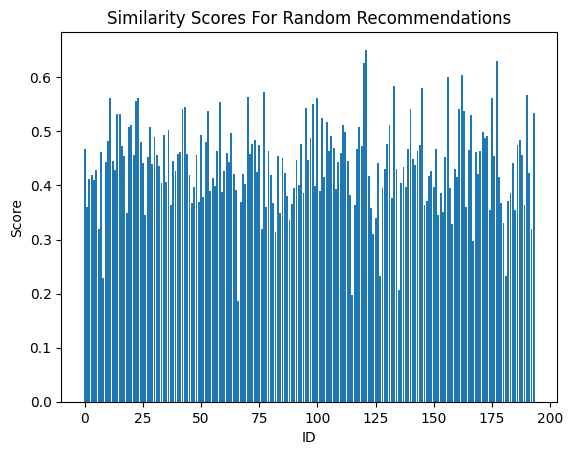

In [14]:
scores = list(results4.values())
total = 0
for i in scores:
    if(i == 0):
        scores.remove(i)
    else:
        total = total+i

total = total / len(scores)
ids = list(range(0, len(scores)))
print(len(scores))
print(total)
plt.bar(ids, scores)
plt.xlabel("ID")
plt.ylabel("Score")
plt.title("Similarity Scores For Random Recommendations")
plt.show()

In [1]:

import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import surprise

In [2]:
userInteractionsDense = pd.read_pickle("Data\\userInteractionsDense.pkl")
gameFeatureMatrix = pd.read_pickle("Data\\gameFeatureMatrix.pkl")
userInteractionsSparse = pd.read_pickle("Data\\userinteractionsSparse.pkl")

In [3]:
reader = surprise.Reader(rating_scale=(1,5))
data = surprise.Dataset.load_from_df(userInteractionsSparse, reader)
train, test = surprise.model_selection.split.train_test_split(data, test_size = 0.2)

svd = surprise.SVD()
svd.fit(train)
pred = svd.test(test)
surprise.accuracy.rmse(pred)

RMSE: 0.7508


0.7507796854679105

In [46]:
u = userInteractionsDense.index[1082]
# preds = np.zeros((svd.trainset.n_items-userInteractionsSparse[userInteractionsSparse["user_id"] == u].count()["user_id"], 2))

import random
results5 = {}

for k in range(200):
        #uid = userInteractionsSparse['user'].sample().values[0]
        uid_list = userInteractionsDense.index.tolist()
        uid = uid_list[random.randint(0,len(uid_list))]
        uid = int(uid)
        games_owned = userInteractionsSparse[userInteractionsSparse["user"] == uid]["appid"].sort_values()
        id_list = []

        for game_id in games_owned:
                id_list.append(game_id)

        
        preds = np.zeros((svd.trainset.n_items, 2))
        i = 0
        for item in svd.trainset.all_items():
            rid = svd.trainset.to_raw_iid(item)
            p = svd.predict(u, rid)
            # if (userInteractionsDense.at[u, rid] == 0):
            preds[i][1] = svd.predict(u, rid).est
            preds[i][0] = rid
            i += 1
        predsDF = pd.DataFrame(data=preds, index=range(preds.shape[0]), columns=["appid", "score"])
        temp = predsDF.sort_values(by="score", ascending=False).head(30)
        appids = temp['appid'].tolist()
        appids = list(map(int, appids))

        results5.update({uid: calc_sim_2(appids, id_list)})

print(results5)


{76561198026310957: 0.511253881984525, 76561198056230765: 0.5463437340868427, 76561198072177636: 0.5809191335431321, 76561198180104678: 0.4603518012158103, 76561199233415721: 0.4464793219511051, 76561198101645813: 0.5236924993951252, 76561197989582533: 0.561871808765663, 76561198266881103: 0.3385761281593523, 76561197990519678: 0.4642202916244652, 76561198329587862: 0.47108978845719707, 76561199060041119: 0.40450183005803914, 76561198078328333: 0.5358573249363465, 76561198998734947: 0.48813417363794387, 76561198164205639: 0.5206696644952775, 76561198391192326: 0.5127411514746082, 76561198871286427: 0.41116384106628795, 76561198858218880: 0.2597974512545344, 76561198195651283: 0.477989910217049, 76561198161597976: 0.532614706501709, 76561198837327515: 0.3835311833561954, 76561198117304912: 0.496290465802958, 76561198055742606: 0.45351410008354426, 76561198355216577: 0.4651894067648326, 76561198305975402: 0.4050561099862818, 76561198352736836: 0.473884151671198, 76561198906342421: 0.4816

197
0.46280647933372004


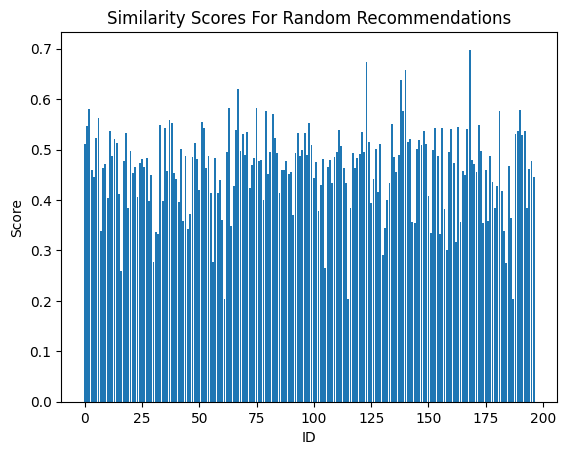

In [47]:
scores = list(results5.values())
total = 0
for i in scores:
    if(i == 0):
        scores.remove(i)
    else:
        total = total+i

total = total / len(scores)
ids = list(range(0, len(scores)))
print(len(scores))
print(total)
plt.bar(ids, scores)
plt.xlabel("ID")
plt.ylabel("Score")
plt.title("Similarity Scores For Random Recommendations")
plt.show()